## We are importing the library sklearn , pandas,numpy ,  matplotlib

In [1]:
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

 ## We have read the dataset using pandas which are the optimized dataframe to perform makes the calculation faster

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance,pickup_hrs,dropoff_hrs,day_week,tpep_pickup_timestamp,tpep_dropoff_timestamp,duration,speed
0,0,2015-01-24 18:00:28,2015-01-24 18:10:07,-73.964111,40.761398,-73.977989,40.783093,2.40,18,18,5,1422122428,1422123007,579,14
1,1,2015-01-15 4:37:29,2015-01-15 4:58:14,-73.961479,40.760410,-73.943573,40.709702,5.00,4,4,3,1421296649,1421297894,1245,14
2,2,2015-01-09 5:14:31,2015-01-09 5:47:16,-73.986893,40.761726,-73.873169,40.774326,10.25,5,5,4,1420780471,1420782436,1965,18
3,3,2015-01-29 9:52:05,2015-01-29 10:16:33,-73.965759,40.758114,-74.010399,40.701965,5.46,9,10,3,1422525125,1422526593,1468,13
4,4,2015-01-02 2:20:01,2015-01-02 2:27:37,-73.955032,40.821857,-73.950897,40.808399,1.50,2,2,4,1420165201,1420165657,456,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171243,199994,2015-01-21 20:41:07,2015-01-21 20:48:43,-73.994392,40.751530,-73.983063,40.761108,1.10,20,20,2,1421872867,1421873323,456,8
171244,199995,2015-01-17 21:18:03,2015-01-17 21:25:40,-73.960876,40.778137,-73.973915,40.764324,1.40,21,21,5,1421529483,1421529940,457,11
171245,199997,2015-01-23 11:04:12,2015-01-23 11:11:52,-73.962616,40.769730,-73.975388,40.763649,1.00,11,11,4,1422011052,1422011512,460,7
171246,199998,2015-01-01 3:00:40,2015-01-01 3:12:10,-74.007408,40.651272,-73.978722,40.678909,2.58,3,3,3,1420081240,1420081930,690,13


In [4]:
df.columns

Index(['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_distance', 'pickup_hrs', 'dropoff_hrs',
       'day_week', 'tpep_pickup_timestamp', 'tpep_dropoff_timestamp',
       'duration', 'speed'],
      dtype='object')

# Now we are preprocess our data

In [5]:
def getDate(x):
    date_time= x.split(" ");
    return date_time[0]

df['date'] = df['tpep_pickup_datetime'].apply(getDate)

In [6]:
df

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance,pickup_hrs,dropoff_hrs,day_week,tpep_pickup_timestamp,tpep_dropoff_timestamp,duration,speed,date
0,0,2015-01-24 18:00:28,2015-01-24 18:10:07,-73.964111,40.761398,-73.977989,40.783093,2.40,18,18,5,1422122428,1422123007,579,14,2015-01-24
1,1,2015-01-15 4:37:29,2015-01-15 4:58:14,-73.961479,40.760410,-73.943573,40.709702,5.00,4,4,3,1421296649,1421297894,1245,14,2015-01-15
2,2,2015-01-09 5:14:31,2015-01-09 5:47:16,-73.986893,40.761726,-73.873169,40.774326,10.25,5,5,4,1420780471,1420782436,1965,18,2015-01-09
3,3,2015-01-29 9:52:05,2015-01-29 10:16:33,-73.965759,40.758114,-74.010399,40.701965,5.46,9,10,3,1422525125,1422526593,1468,13,2015-01-29
4,4,2015-01-02 2:20:01,2015-01-02 2:27:37,-73.955032,40.821857,-73.950897,40.808399,1.50,2,2,4,1420165201,1420165657,456,11,2015-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171243,199994,2015-01-21 20:41:07,2015-01-21 20:48:43,-73.994392,40.751530,-73.983063,40.761108,1.10,20,20,2,1421872867,1421873323,456,8,2015-01-21
171244,199995,2015-01-17 21:18:03,2015-01-17 21:25:40,-73.960876,40.778137,-73.973915,40.764324,1.40,21,21,5,1421529483,1421529940,457,11,2015-01-17
171245,199997,2015-01-23 11:04:12,2015-01-23 11:11:52,-73.962616,40.769730,-73.975388,40.763649,1.00,11,11,4,1422011052,1422011512,460,7,2015-01-23
171246,199998,2015-01-01 3:00:40,2015-01-01 3:12:10,-74.007408,40.651272,-73.978722,40.678909,2.58,3,3,3,1420081240,1420081930,690,13,2015-01-01


In [7]:
uber_df = pd.read_csv('uber_nyc_enriched.csv')

In [8]:
uber_df

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [9]:
uber_df['date'] = uber_df['pickup_dt'].apply(getDate)
uber_df

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,date
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015-01-01
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015-01-01
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015-01-01
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015-01-01
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015-06-30
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015-06-30
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015-06-30
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015-06-30


In [10]:
set(df['date'])

{'2015-01-01',
 '2015-01-02',
 '2015-01-03',
 '2015-01-04',
 '2015-01-05',
 '2015-01-06',
 '2015-01-07',
 '2015-01-08',
 '2015-01-09',
 '2015-01-10',
 '2015-01-11',
 '2015-01-12',
 '2015-01-13',
 '2015-01-14',
 '2015-01-15',
 '2015-01-16',
 '2015-01-17',
 '2015-01-18',
 '2015-01-19',
 '2015-01-20',
 '2015-01-21',
 '2015-01-22',
 '2015-01-23',
 '2015-01-24',
 '2015-01-25',
 '2015-01-26',
 '2015-01-27',
 '2015-01-28',
 '2015-01-29',
 '2015-01-30',
 '2015-01-31'}

In [11]:
set(uber_df['date'])

{'2015-01-01',
 '2015-01-02',
 '2015-01-03',
 '2015-01-04',
 '2015-01-05',
 '2015-01-06',
 '2015-01-07',
 '2015-01-08',
 '2015-01-09',
 '2015-01-10',
 '2015-01-11',
 '2015-01-12',
 '2015-01-13',
 '2015-01-14',
 '2015-01-15',
 '2015-01-16',
 '2015-01-17',
 '2015-01-18',
 '2015-01-19',
 '2015-01-20',
 '2015-01-21',
 '2015-01-22',
 '2015-01-23',
 '2015-01-24',
 '2015-01-25',
 '2015-01-26',
 '2015-01-27',
 '2015-01-28',
 '2015-01-29',
 '2015-01-30',
 '2015-01-31',
 '2015-02-01',
 '2015-02-02',
 '2015-02-03',
 '2015-02-04',
 '2015-02-05',
 '2015-02-06',
 '2015-02-07',
 '2015-02-08',
 '2015-02-09',
 '2015-02-10',
 '2015-02-11',
 '2015-02-12',
 '2015-02-13',
 '2015-02-14',
 '2015-02-15',
 '2015-02-16',
 '2015-02-17',
 '2015-02-18',
 '2015-02-19',
 '2015-02-20',
 '2015-02-21',
 '2015-02-22',
 '2015-02-23',
 '2015-02-24',
 '2015-02-25',
 '2015-02-26',
 '2015-02-27',
 '2015-02-28',
 '2015-03-01',
 '2015-03-02',
 '2015-03-03',
 '2015-03-04',
 '2015-03-05',
 '2015-03-06',
 '2015-03-07',
 '2015-03-

## lets do data intergration so that we can holiday feature in our dataset

In [12]:
holiday=uber_df[['date','hday']]

In [13]:
hmap=dict()
for i in range(len(holiday)):
    hmap[holiday['date'][i]]=holiday['hday'][i]

In [14]:
def mapHoliday(x):
    if hmap[str(x)] == 'Y': 
        return 1
    return 0

df['isHoliday']=df['date'].apply(mapHoliday)

In [15]:
df

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance,pickup_hrs,dropoff_hrs,day_week,tpep_pickup_timestamp,tpep_dropoff_timestamp,duration,speed,date,isHoliday
0,0,2015-01-24 18:00:28,2015-01-24 18:10:07,-73.964111,40.761398,-73.977989,40.783093,2.40,18,18,5,1422122428,1422123007,579,14,2015-01-24,0
1,1,2015-01-15 4:37:29,2015-01-15 4:58:14,-73.961479,40.760410,-73.943573,40.709702,5.00,4,4,3,1421296649,1421297894,1245,14,2015-01-15,0
2,2,2015-01-09 5:14:31,2015-01-09 5:47:16,-73.986893,40.761726,-73.873169,40.774326,10.25,5,5,4,1420780471,1420782436,1965,18,2015-01-09,0
3,3,2015-01-29 9:52:05,2015-01-29 10:16:33,-73.965759,40.758114,-74.010399,40.701965,5.46,9,10,3,1422525125,1422526593,1468,13,2015-01-29,0
4,4,2015-01-02 2:20:01,2015-01-02 2:27:37,-73.955032,40.821857,-73.950897,40.808399,1.50,2,2,4,1420165201,1420165657,456,11,2015-01-02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171243,199994,2015-01-21 20:41:07,2015-01-21 20:48:43,-73.994392,40.751530,-73.983063,40.761108,1.10,20,20,2,1421872867,1421873323,456,8,2015-01-21,0
171244,199995,2015-01-17 21:18:03,2015-01-17 21:25:40,-73.960876,40.778137,-73.973915,40.764324,1.40,21,21,5,1421529483,1421529940,457,11,2015-01-17,0
171245,199997,2015-01-23 11:04:12,2015-01-23 11:11:52,-73.962616,40.769730,-73.975388,40.763649,1.00,11,11,4,1422011052,1422011512,460,7,2015-01-23,0
171246,199998,2015-01-01 3:00:40,2015-01-01 3:12:10,-74.007408,40.651272,-73.978722,40.678909,2.58,3,3,3,1420081240,1420081930,690,13,2015-01-01,1


### this will check whether their is any null values in the dataset 

In [16]:
df.isnull().sum().sort_values(ascending=False)

isHoliday                 0
trip_distance             0
tpep_pickup_datetime      0
tpep_dropoff_datetime     0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
pickup_hrs                0
date                      0
dropoff_hrs               0
day_week                  0
tpep_pickup_timestamp     0
tpep_dropoff_timestamp    0
duration                  0
speed                     0
Unnamed: 0                0
dtype: int64

## Outliers detection

In [17]:
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    #df.drop(df.index[outlier_indices], inplace=True)
    return outlier_indices, outlier_values

In [18]:
columns_to_check_outliers=[
        'trip_distance', 'pickup_hrs', 'dropoff_hrs',
       'day_week', 'tpep_pickup_timestamp', 'tpep_dropoff_timestamp',
       'duration', 'speed'
]

In [19]:
for i in columns_to_check_outliers:
    temp1=i+'_indices'
    temp2=i+'_values'
    temp1, temp2 = find_outliers_tukey(df[i])
    print("Outliers for ",i)
    print(np.sort(temp2))
df.drop(df.index[temp1], inplace=True)

Outliers for  trip_distance
[ 6.78  6.78  6.78 ... 63.4  68.1  74.8 ]
Outliers for  pickup_hrs
[]
Outliers for  dropoff_hrs
[]
Outliers for  day_week
[]
Outliers for  tpep_pickup_timestamp
[]
Outliers for  tpep_dropoff_timestamp
[]
Outliers for  duration
[ 1821  1821  1821 ...  9060  9150 15306]
Outliers for  speed
[ 25  25  25 ... 133 133 137]


Text(0, 0.5, 'duration')

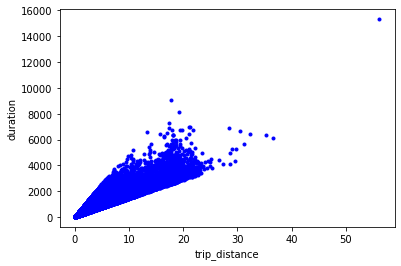

In [20]:
plt.plot(df['trip_distance'],df['duration'],'b.')
plt.xlabel('trip_distance')
plt.ylabel('duration')

In [21]:
df = df[df['trip_distance']<50]

Text(0, 0.5, 'duration')

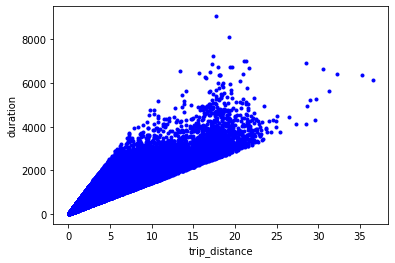

In [22]:
plt.plot(df['trip_distance'],df['duration'],'b.')
plt.xlabel('trip_distance')
plt.ylabel('duration')

## let's do the feature selection

In [23]:
df.columns
col_to_remove = ['tpep_pickup_datetime', 'tpep_dropoff_datetime','Unnamed: 0','date']
df = df.drop(col_to_remove, axis=1) 
df.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_distance', 'pickup_hrs', 'dropoff_hrs',
       'day_week', 'tpep_pickup_timestamp', 'tpep_dropoff_timestamp',
       'duration', 'speed', 'isHoliday'],
      dtype='object')

In [24]:
col_order=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_distance', 'pickup_hrs', 'dropoff_hrs',
       'day_week', 'tpep_pickup_timestamp', 'tpep_dropoff_timestamp',
        'speed', 'isHoliday','duration']
print(len(col_order))
df=df[col_order]

13


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(df)

In [26]:
col=df.columns
for i in range(0,len(col)-1):
    df[col[i]]=scaled_df[:,i]
df

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance,pickup_hrs,dropoff_hrs,day_week,tpep_pickup_timestamp,tpep_dropoff_timestamp,speed,isHoliday,duration
0,0.051404,0.802866,0.003764,0.993625,0.065372,0.782609,0.782609,0.833333,0.766139,0.765614,0.411765,0.0,579
1,0.051438,0.802847,0.004227,0.991837,0.136488,0.173913,0.173913,0.500000,0.457828,0.457828,0.411765,0.0,1245
2,0.051112,0.802872,0.005175,0.993412,0.280088,0.217391,0.217391,0.666667,0.265108,0.265551,0.647059,0.0,1965
3,0.051383,0.802801,0.003327,0.991649,0.149070,0.391304,0.434783,0.500000,0.916490,0.916161,0.352941,0.0,1468
4,0.051520,0.804057,0.004129,0.994242,0.040755,0.086957,0.086957,0.666667,0.035392,0.035478,0.235294,0.0,456
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171242,0.051001,0.802184,0.003743,0.992265,0.029814,0.782609,0.782609,0.166667,0.637733,0.637269,0.117647,0.0,431
171243,0.051016,0.802672,0.003696,0.993090,0.029814,0.869565,0.869565,0.333333,0.672964,0.672476,0.058824,0.0,456
171244,0.051445,0.803196,0.003819,0.993168,0.038020,0.913043,0.913043,0.833333,0.544758,0.544387,0.235294,0.0,457
171245,0.051423,0.803030,0.003799,0.993152,0.027079,0.478261,0.478261,0.666667,0.724556,0.724024,0.000000,0.0,460


In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,:-1]  
y = df.iloc[:,-1]   
y=y.astype('float')
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(12,'Score')) 

                     Specs        Score
4            trip_distance  9692.267888
2        dropoff_longitude  3441.445764
11               isHoliday  3270.835179
10                   speed  2989.446275
0         pickup_longitude   985.481572
7                 day_week   664.788442
9   tpep_dropoff_timestamp   622.947736
8    tpep_pickup_timestamp   622.321105
6              dropoff_hrs   456.876958
5               pickup_hrs   443.858175
3         dropoff_latitude    70.138161
1          pickup_latitude    61.184337


##  lets split our dataset into training and testing datasets

In [28]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

## lets build our simple Linear regression model

In [29]:
def getPlot(model,test_x,test_y):
    y_pred = model.predict(test_x) 
    plt.plot(test_x['trip_distance'],test_y,'b.')
    plt.plot(test_x['trip_distance'],y_pred,'r-') 
    plt.xlabel('trip_distance')
    plt.ylabel('duration')  

In [30]:
def createModel(selected_feature,df,model):
    df=df[selected_feature]
    independent= df.iloc[:,:-1]
    dependent = df.iloc[:,-1]
    independent, test_x, dependent, test_y = train_test_split(independent, dependent, test_size=0.25, random_state=0)
    model.fit(independent,dependent)
    print(model)
    print("model accracy is "+ str(model.score(test_x,test_y))) 
    getPlot(model,test_x,test_y)
    return model.score(test_x,test_y)

## We have created a simple model with feature "distance"

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model accracy is 0.8034512948173701


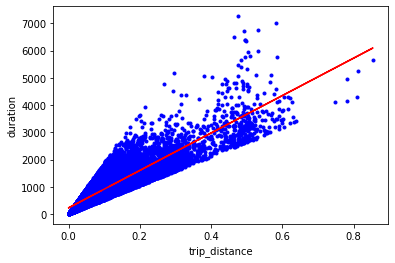

In [31]:
accuracy=[]
selected_col=['trip_distance','duration']
simple_model = LinearRegression()
accuracy.append(createModel(selected_col,df,simple_model))

## Advanced model having  selected_feature
['trip_distance','dropoff_longitude','dropoff_hrs',
'tpep_dropoff_timestamp','pickup_hrs','isHoliday','speed',
'pickup_longitude','day_week','duration']


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model accracy is 0.903990850047781


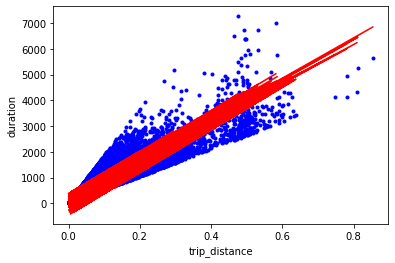

In [32]:
selected_feature=['trip_distance','dropoff_longitude','dropoff_hrs','pickup_hrs','isHoliday','speed','pickup_longitude','day_week','duration']
advanced_model = LinearRegression() 
accuracy.append(createModel(selected_feature,df,advanced_model))

# let's try Decision tree Regression

In [33]:
 from sklearn.tree import DecisionTreeRegressor

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
model accracy is 0.7195073029724213


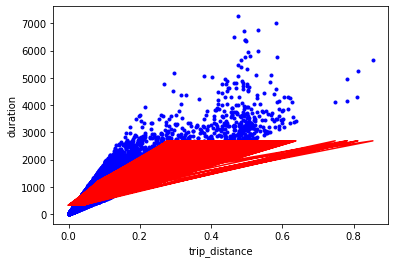

In [34]:
de_reg1 = DecisionTreeRegressor(max_depth=2)
accuracy.append(createModel(selected_feature,df,de_reg1))

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
model accracy is 0.9369273250258211


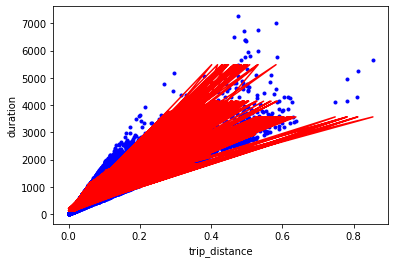

In [35]:
de_reg2 = DecisionTreeRegressor(max_depth=5)
accuracy.append(createModel(selected_feature,df,de_reg2))

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
model accracy is 0.897962661841011


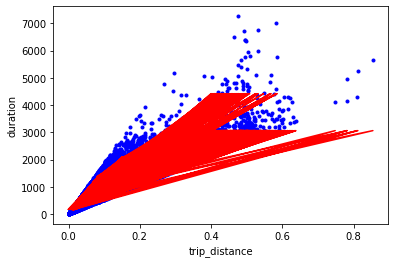

In [36]:
de_reg2 = DecisionTreeRegressor(max_depth=4)
accuracy.append(createModel(selected_feature,df,de_reg2))

## Now we use Ensamble learning Random Forest Regression

/home/siddharth/ENTER/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
model accracy is 0.9531350962385482


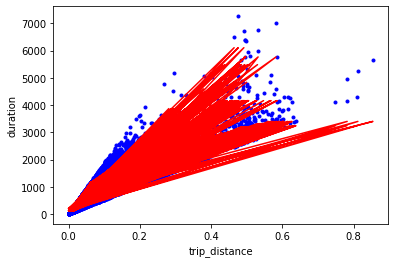

In [37]:
Rf_reg = RandomForestRegressor(max_depth=5,random_state=0)
accuracy.append(createModel(selected_feature,df,Rf_reg))

In [38]:
accuracy

[0.8034512948173701,
 0.903990850047781,
 0.7195073029724213,
 0.9369273250258211,
 0.897962661841011,
 0.9531350962385482]

## Knn regression

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
model accracy is 0.9586222815537633


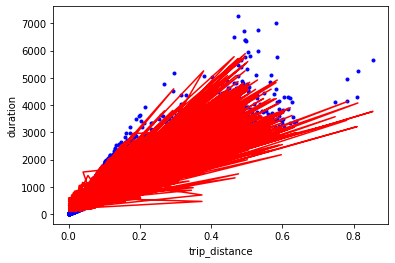

In [39]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(5, weights='uniform')
accuracy.append(createModel(selected_feature,df,knn))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')
model accracy is 0.9678863739882441


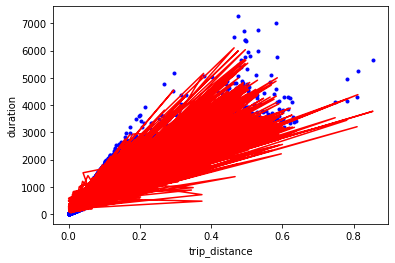

In [40]:
knn = KNeighborsRegressor(5, weights='distance')
accuracy.append(createModel(selected_feature,df,knn))

## The comparision of diffrent models

Text(0.5, 1.0, 'comparision of model')

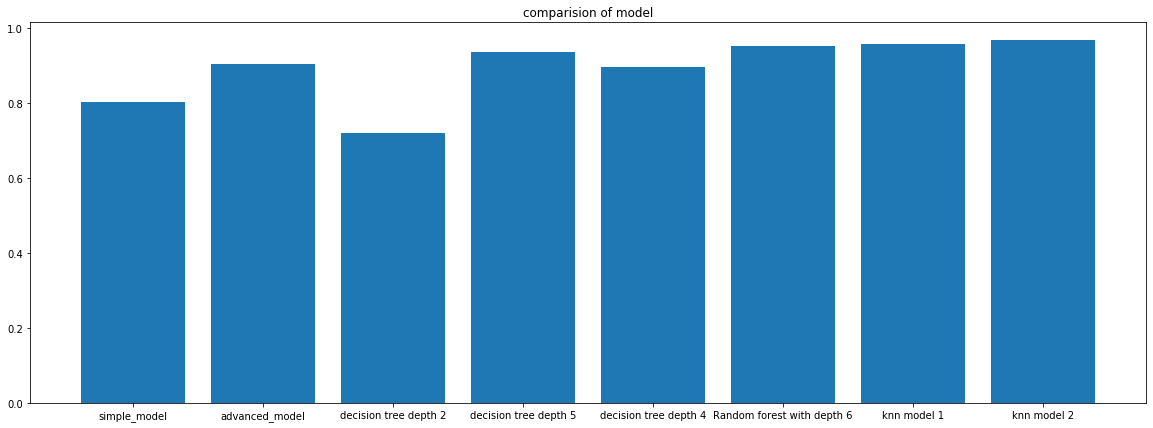

In [41]:
model=['simple_model','advanced_model','decision tree depth 2','decision tree depth 5','decision tree depth 4',
      'Random forest with depth 6','knn model 1','knn model 2']
plt.figure(figsize=(20,7))
plt.bar(model,accuracy)
plt.title('comparision of model')

Text(0.5, 1.0, 'comparision of model')

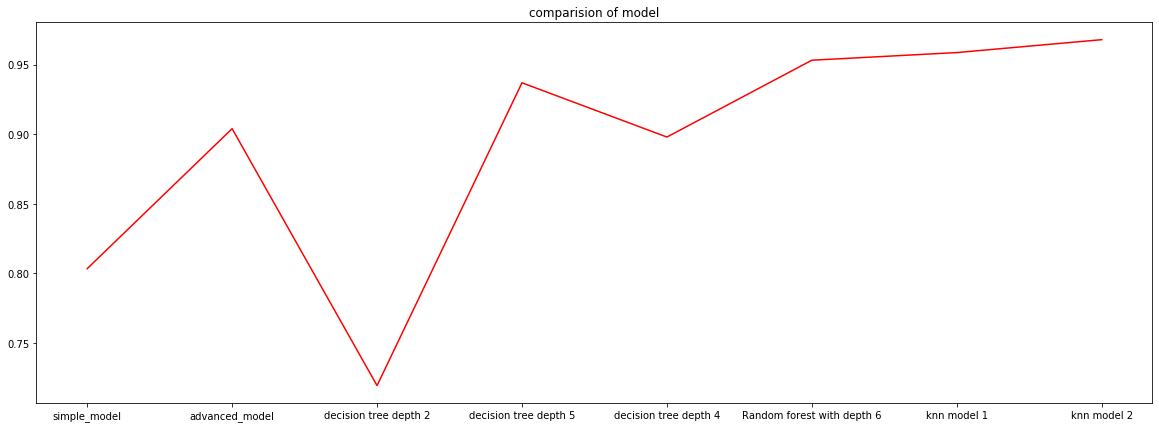

In [42]:
plt.figure(figsize=(20,7))
plt.plot(model,accuracy,'r-')
plt.title('comparision of model')